# Using Decision Trees and Deep Learning to Classify Wine Quality
The following project aims to use machine learning methods to determine the quality of wines, depending on other attributes (e.g. pH, acidity, sugar) 

The data used is provided by the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). This data consists of two datasets; one for red wine and one for white wine. The wines are related to variants of the Portuguese "Vinho Verde" wine.


The predicion shall be the `quality` variable of the dataset and ranges from 0 to 10 – multiclass classifier

<br/>

References used:

[MIT Deep Learning Basics](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb#scrollTo=i7j-gqcYq4Ap)



## Data Exploration

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow import keras
from keras import layers
from keras.utils import plot_model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

### Loading and arranging the data

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV files as pandas DataFrames
df_red = pd.read_csv('/content/drive/MyDrive/DataSci/winequality-red.csv', delimiter=';')
df_white = pd.read_csv('/content/drive/MyDrive/DataSci/winequality-white.csv', delimiter=';')
# Add a new column 'wine_type' for each DataFrame and set its value accordingly
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'
# Combine the two DataFrames into a single DataFrame and reset index
df_wine = pd.concat([df_red, df_white], ignore_index=True)

### First visualization of the data

In [ ]:
# Display the combined DataFrame in table form
display(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
# Display basic statistics for the numeric columns
print(df_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [ ]:
# Display the number of samples for each quality level
quality_counts = df_wine['quality'].value_counts().sort_index()
quality_counts

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

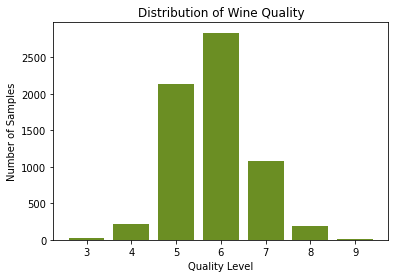

In [ ]:
# Create a bar chart of the quality level
plt.bar(quality_counts.index, quality_counts.values, color='olivedrab')
# Add labels and title
plt.xlabel('Quality Level')
plt.ylabel('Number of Samples')
plt.title('Distribution of Wine Quality')
# Show the plot
plt.show()

## Data Preprocessing

### One hot encode the wine type
One hot encoding is neccesary to transform the categorical variable `wine_type` into numerical variables, as most machine learning algorithms will require numeric data.

In [ ]:
# One hot encode the "wine_type" column
df_wine = pd.get_dummies(df_wine, columns=["wine_type"])
# Display the resulting DataFrame
display(df_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red,wine_type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1


### Defining label and Spliting dataset into training and testing set

In [ ]:
# Define the features and label
X = df_wine.drop('quality', axis=1)
y = df_wine['quality']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the counts for each quality level in the test set
unique_levels, counts = np.unique(y_test, return_counts=True)
for level, count in zip(unique_levels, counts):
    print(f"Quality level {level}: {count} samples")

Quality level 3: 6 samples
Quality level 4: 43 samples
Quality level 5: 402 samples
Quality level 6: 597 samples
Quality level 7: 215 samples
Quality level 8: 36 samples
Quality level 9: 1 samples


### Normalization

In [ ]:
# MinMaxScaler used to normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification

### Training a random forest classifier



In [ ]:
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training set
rf.fit(X_train, y_train)
# Use the trained classifier to make predictions on the test set
y_pred = rf.predict(X_test)

### Asessing the results

In [ ]:
# Calculate precision, recall, and F1-score for each label
report = classification_report(y_test, y_pred, zero_division=1)
print(report)
# Calculate the detailed accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.62      0.12      0.20        43
           5       0.68      0.73      0.71       402
           6       0.67      0.77      0.72       597
           7       0.72      0.56      0.63       215
           8       0.86      0.33      0.48        36
           9       1.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.65      0.36      0.39      1300
weighted avg       0.68      0.68      0.67      1300

Accuracy: 0.683076923076923


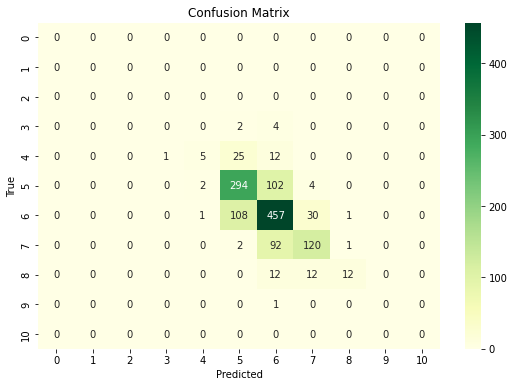

In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10])
# Define the class labels
class_labels = [0,1,2,3,4,5,6,7,8,9,10]
# Create a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(9, 6)) # set the figure size
sns.heatmap(cm, annot=True, cmap="YlGn", xticklabels=class_labels, yticklabels=class_labels, fmt="d")
# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Using Recursive Feature Elimination (RFE) and cross-validation select a minimum set

RFECV performs RFE with cross-validation to find the optimal number of features by evaluating the performance of the model with different subsets of features.

RFECV (with the default 5-fold cross-validation) shows that the model with 11 features delivers the best scores. The minimum feature set leaves out the features `wine_type_red` and `wine_type_white`.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Optimal number of features : 11


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


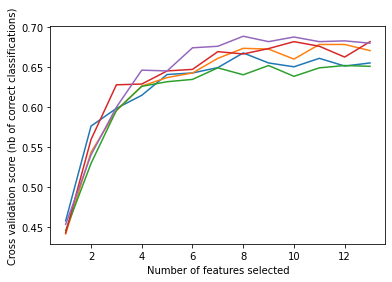

In [ ]:
# Create a recursive feature elimination with cross-validation selector
rfecv = RFECV(estimator=rf, step=1, scoring='accuracy')
# Fit the selector to the training data
rfecv.fit(X_train, y_train)
# Print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
# select the top 11 features
selected_features = rfecv.support_
X_train_min_rfecv = X_train[:, selected_features]
X_test_min_rfecv = X_test[:, selected_features]

In [ ]:
# Visualize the selected features
print("Selected features: ", selected_features)

Selected features:  [ True  True  True  True  True  True  True  True  True  True  True False
 False]


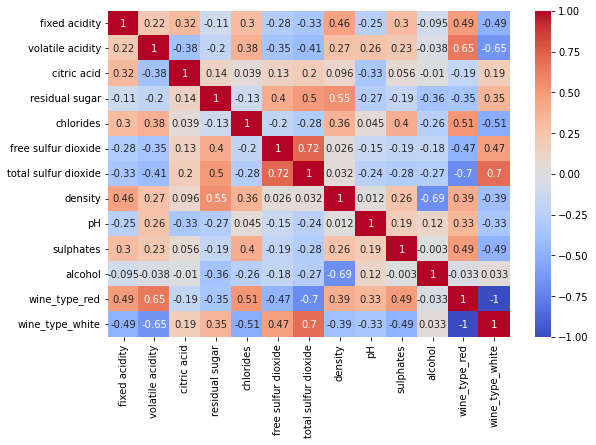

In [ ]:
# Plot a correlatoin matrix of all features
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(9, 6)) # set the figure size
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

### Training a random forest classifier on the rfecv minimum feature set

In [ ]:
# Create a random forest classifier with 100 trees
rf_min_rfecv = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier on the training set
rf_min_rfecv.fit(X_train_min_rfecv, y_train)
# Use the trained classifier to make predictions on the test set
y_pred_min_rfecv = rf_min_rfecv.predict(X_test_min_rfecv)

### Comparison of the results to the full feature set
the accuracy declines with lower amounts of features

In [ ]:
# Calculate precision, recall, and F1-score for each label
report = classification_report(y_test, y_pred_min_rfecv, zero_division=1)
print(report)
# Calculate the detailed accuracy of the predictions
accuracy_min_rfecv = accuracy_score(y_test, y_pred_min_rfecv)
print('minimum feature accuracy:', accuracy_min_rfecv,'\nfull feature accuracy:', accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.66      0.75      0.70       597
           7       0.70      0.55      0.62       215
           8       0.92      0.33      0.49        36
           9       1.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.67      0.35      0.38      1300
weighted avg       0.67      0.67      0.66      1300

minimum feature accuracy: 0.6684615384615384 
full feature accuracy: 0.683076923076923


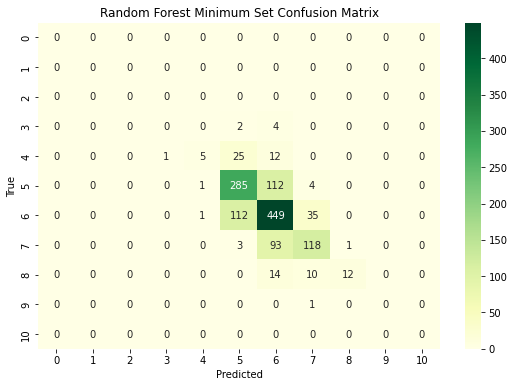

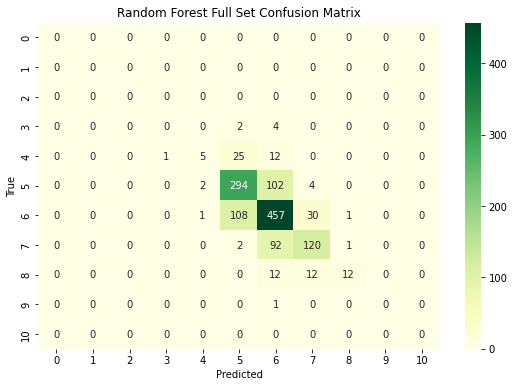

In [ ]:
# Create the confusion matrix for the minimum feature set
cm_min_rfecv = confusion_matrix(y_test, y_pred_min_rfecv, labels=[0,1,2,3,4,5,6,7,8,9,10])
# Define the class labels
class_labels = [0,1,2,3,4,5,6,7,8,9,10]
# Create a heatmap of the confusion matrix for the minimum feature set
fig, ax = plt.subplots(figsize=(9, 6)) # set the figure size
sns.heatmap(cm_min_rfecv, annot=True, cmap="YlGn", xticklabels=class_labels, yticklabels=class_labels, fmt="d")
# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Minimum Set Confusion Matrix')
plt.show()
# Create a heatmap of the confusion matrix for the full feature set
fig, ax = plt.subplots(figsize=(9, 6)) # set the figure size
sns.heatmap(cm, annot=True, cmap="YlGn", xticklabels=class_labels, yticklabels=class_labels, fmt="d")
# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Full Set Confusion Matrix')
plt.show()

### Training a sequential model on the full feature set


In [ ]:
# Set the seed for reproducable results
tf.random.set_seed(42)
# Make the output less verbose but still show progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
# Create a model using the Sequential API
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax') # output layer with 11 units and softmax activation
])
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, keras.utils.to_categorical(y_train, num_classes=11), epochs=70, verbose=0, callbacks=[PrintDot()])


......................................................................

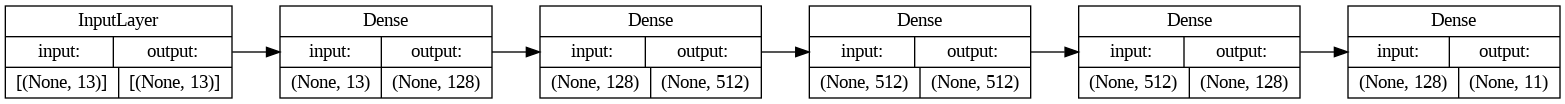

In [ ]:
# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=False, rankdir='LR')

41/41 [==============================] - 0s 2ms/step
Accuracy: 0.5907692307692308


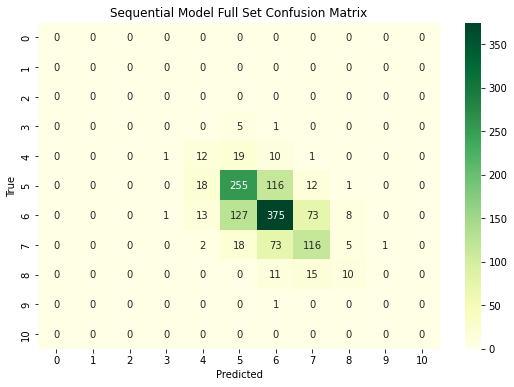

In [ ]:
# Predict class probabilities for the test data
y_pred_probs = model.predict(X_test)
# Convert class probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10])
# Plot the confusion matrix
class_labels = [0,1,2,3,4,5,6,7,8,9,10]
fig, ax = plt.subplots(figsize=(9, 6)) # set the figure size
sns.heatmap(cm, annot=True, cmap='YlGn', xticklabels=class_labels, yticklabels=class_labels, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Sequential Model Full Set Confusion Matrix')
plt.show()

In [ ]:
# Calculate precision, recall, and F1-score for each label
precision = precision_score(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average=None, zero_division=1)
recall = recall_score(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average=None, zero_division=1)
f1 = f1_score(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average=None, zero_division=1)
# Print the precision, recall, and F1-score for each label
for i in range(11):
    print(f"Label {i}: precision = {precision[i]:.2f}, recall = {recall[i]:.2f}, F1-score = {f1[i]:.2f}")

Label 0: precision = 1.00, recall = 1.00, F1-score = 1.00
Label 1: precision = 1.00, recall = 1.00, F1-score = 1.00
Label 2: precision = 1.00, recall = 1.00, F1-score = 1.00
Label 3: precision = 0.00, recall = 0.00, F1-score = 0.00
Label 4: precision = 0.27, recall = 0.28, F1-score = 0.27
Label 5: precision = 0.60, recall = 0.63, F1-score = 0.62
Label 6: precision = 0.64, recall = 0.63, F1-score = 0.63
Label 7: precision = 0.53, recall = 0.54, F1-score = 0.54
Label 8: precision = 0.42, recall = 0.28, F1-score = 0.33
Label 9: precision = 0.00, recall = 0.00, F1-score = 0.00
Label 10: precision = 1.00, recall = 1.00, F1-score = 1.00


### Training a sequential model on the rfecv minimum feature set


In [ ]:
# Set the seed for reproducable results
tf.random.set_seed(42)
# Make the output less verbose but still show progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
# Create a model using the Sequential API
model_min_rfecv = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_min_rfecv.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax') # output layer with 10 units and softmax activation
])
# Compile the model
model_min_rfecv.compile(optimizer=keras.optimizers.Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model
history = model_min_rfecv.fit(X_train_min_rfecv, keras.utils.to_categorical(y_train, num_classes=11), epochs=70, verbose=0, callbacks=[PrintDot()])


......................................................................

41/41 [==============================] - 0s 2ms/step
Accuracy: 0.5907692307692308


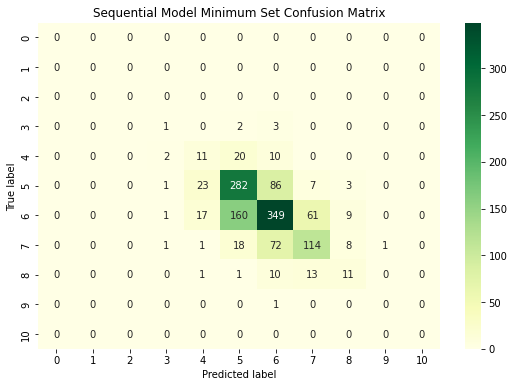

In [ ]:
# Predict class probabilities for the test data
y_pred_probs = model_min_rfecv.predict(X_test_min_rfecv)
# Convert class probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10])
# Plot the confusion matrix
class_labels = [0,1,2,3,4,5,6,7,8,9,10]
fig, ax = plt.subplots(figsize=(9, 6)) # set the figure size
sns.heatmap(cm, annot=True, cmap='YlGn', xticklabels=class_labels, yticklabels=class_labels, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Sequential Model Minimum Set Confusion Matrix')
plt.show()

In [ ]:
# Calculate precision, recall, and F1-score for each label
precision = precision_score(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average=None, zero_division=1)
recall = recall_score(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average=None, zero_division=1)
f1 = f1_score(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average=None, zero_division=1)
# Print the precision, recall, and F1-score for each label
for i in range(11):
    print(f"Label {i}: precision = {precision[i]:.2f}, recall = {recall[i]:.2f}, F1-score = {f1[i]:.2f}")

Label 0: precision = 1.00, recall = 1.00, F1-score = 1.00
Label 1: precision = 1.00, recall = 1.00, F1-score = 1.00
Label 2: precision = 1.00, recall = 1.00, F1-score = 1.00
Label 3: precision = 0.25, recall = 0.17, F1-score = 0.20
Label 4: precision = 0.29, recall = 0.28, F1-score = 0.28
Label 5: precision = 0.59, recall = 0.70, F1-score = 0.64
Label 6: precision = 0.64, recall = 0.57, F1-score = 0.61
Label 7: precision = 0.55, recall = 0.55, F1-score = 0.55
Label 8: precision = 0.41, recall = 0.36, F1-score = 0.38
Label 9: precision = 1.00, recall = 0.00, F1-score = 0.00
Label 10: precision = 1.00, recall = 1.00, F1-score = 1.00
